In [1]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/K27ac_HRM/")

In [12]:
suppressPackageStartupMessages({
    library(dplyr)
    library(tidyverse)
    library(ggplot2)
    library(ggsci)
})

In [ ]:
25
31
14
9

In [32]:
nH <- 25/(264*(361/10185))
nP <- 31/(532*(361/10185))
uH <- 14/(136*(361/10185))
uP <- 9/(303*(361/10185))

In [33]:
res <- cbind(enrichment=c(uP,uH,nP,nH),
      group=c("G1","G2","G3","G4")) %>% as.data.frame()

In [34]:
res$enrichment <- as.numeric(res$enrichment)

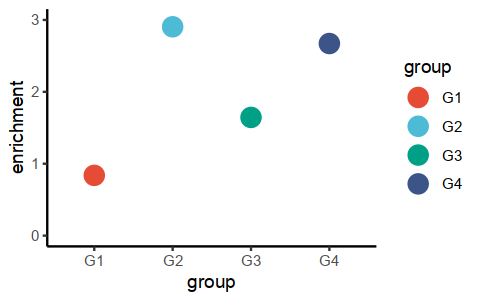

In [36]:
options(repr.plot.width=4,repr.plot.height=2.5)
ggplot(data = res,aes(x=group,y=enrichment,colour=group))+
geom_point(shape=19,size=5)+
scale_color_npg()+
theme_classic()+
ylim(0,3)
ggsave("../../FINAL_figures/H3K27ac.HRM.enrichment.pdf",height=2.5,width=4)

In [37]:
eH <- 19/(639*(361/10185))
eHM <- 11/(159*(361/10185))
eHR <- 281/(6926*(361/10185))
eHRM <- 75/(1277*(361/10185))

In [38]:
res2 <- cbind(enrichment=c(eHRM,eHR,eHM,eH),
      group=c("HRM","HR","HM","H")) %>% as.data.frame()

In [39]:
res2$enrichment <- as.numeric(res2$enrichment)

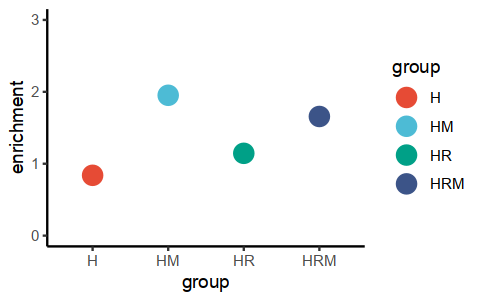

In [41]:
options(repr.plot.width=4,repr.plot.height=2.5)
ggplot(data = res2,aes(x=group,y=enrichment,colour=group))+
geom_point(shape=19,size=5)+
scale_color_npg()+
theme_classic()+
ylim(0,3)
ggsave("../../FINAL_figures/H3K27ac.allpeak.enrichment.pdf",height=2.5,width=4)

In [45]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/H3K27ac/data")

In [63]:
RH <- read.table("eN.compare.RG.SIO.bed.eNloops.Anchor.Rhe10Mac.minMatch0.1") %>% 
filter(V5==1)%>% select(-V5)

In [64]:
MR <- read.table("eN.compare.RG.SIO.bed.eNloops.Anchor.Rhe10Mac.minMatch0.1.mm10")%>% 
filter(V5==1) %>% select(-V5)

In [70]:
res <- dplyr::inner_join(RH,MR,by="V4") %>%
set_names(paste0("V",1:7)) %>% 
select(V4,V1,V2,V3,V5,V6,V7)

In [71]:
write.table(res,"./eN.compare.RG.SIO.bed.eNloops.Anchor.HRM.peaired.bed",
            col.names = F,row.names = F,sep="\t",quote=F)

In [72]:
paired <- read.table("eN.compare.RG.SIO.bed.eNloops.Anchor.HRM.peaired.bed")

In [77]:
paired.adj <- paired %>% 
mutate(H=V2+((V3-V2)/2),R=V5+((V6-V5)/2),M=V8+((V9-V8)/2)) %>%
mutate(Hs=H-2500,He=H+2500,Rs=R-2500,Re=R+2500,Ms=M-2500,Me=M+2500) %>% 
select(V1,Hs,He,V4,Rs,Re,V7,Ms,Me)

In [78]:
write.table(paired.adj,"./eN.compare.RG.SIO.bed.eNloops.Anchor.HRM.peaired.bed.adjTo5kb",
            col.names = F,row.names = F,sep="\t",quote=F)

In [80]:
Hloops <- read.table("./eN.compare.RG.SIO.bed.eNloops.Anchor.HRM.peaired.bed.adjTo5kb.Hloop")
Rloops <- read.table("./eN.compare.RG.SIO.bed.eNloops.Anchor.HRM.peaired.bed.adjTo5kb.Rloop")
Mloops <- read.table("./eN.compare.RG.SIO.bed.eNloops.Anchor.HRM.peaired.bed.adjTo5kb.Mloop")

In [92]:
Hloops %>% mutate(species="human",length=abs(V6-V3)) %>%
filter(length>0) %>% .$length %>% summary()
Rloops %>% mutate(species="human",length=abs(V6-V3)) %>%
filter(length>0) %>% .$length %>% summary()
Mloops %>% mutate(species="human",length=abs(V6-V3)) %>%
filter(length>0) %>% .$length %>% summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25000  200000  475000  693039 1100000 3175000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  24220  211337  467459  675706 1096491 3235997 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     310   161483   366213   913132   999899 21673653 

Warning message:
“Removed 17 rows containing non-finite values (`stat_ecdf()`).”


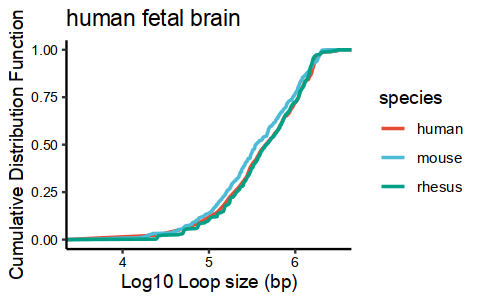

In [94]:
rbind(Hloops %>% mutate(species="human",length=abs(V6-V3)),
Rloops %>% mutate(species="rhesus",length=abs(V6-V3)),
Mloops %>% mutate(species="mouse",length=abs(V6-V3))) %>%
filter(length>0) %>% 
ggplot(aes(log((length),10))) + stat_ecdf(aes(colour = species),geom = "line",size=0.75)+
  scale_color_npg()+
  #geom_smooth(method = "loess",se = FALSE)+
  #geom_xspline()+
  scale_x_continuous(limits = c(3.5,6.5))+
  #scale_y_continuous(limits = c(0.01,1))+
  labs(x="Log10 Loop size (bp)", y="Cumulative Distribution Function",title="human fetal brain")+
  theme_classic()+
theme(axis.text.x = element_text(color="black", size=8),axis.text.y = element_text(color="black", size=8))